In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

import six
import sys
sys.modules['sklearn.externals.six'] = six

from IPython.display import Image
import six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


In [2]:
file_path = '/Users/harshsharma/Desktop/ai-engineer-roadmap-2024/ML Models/Decision Trees/Housing.csv'

In [3]:
housing = pd.read_csv(file_path)

In [4]:
varlist = ['mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))

In [5]:
status = pd.get_dummies(housing['furnishingstatus'], dtype = int, drop_first=True)

In [6]:
housing = pd.concat([housing, status], axis = 1)

In [7]:
housing = housing.drop('furnishingstatus', axis = 1)

In [8]:
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [9]:
scaler = MinMaxScaler()
df_train['price'] = scaler.fit_transform(df_train[['price']])
df_test['price'] = scaler.fit_transform(df_test[['price']])
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [10]:
rf = RandomForestRegressor(random_state=42, n_jobs = -1, max_depth=5, min_samples_leaf=10)

In [11]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [16]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X_train.columns,
                    class_names=['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return graph

In [12]:
sample_tree = rf.estimators_[10]

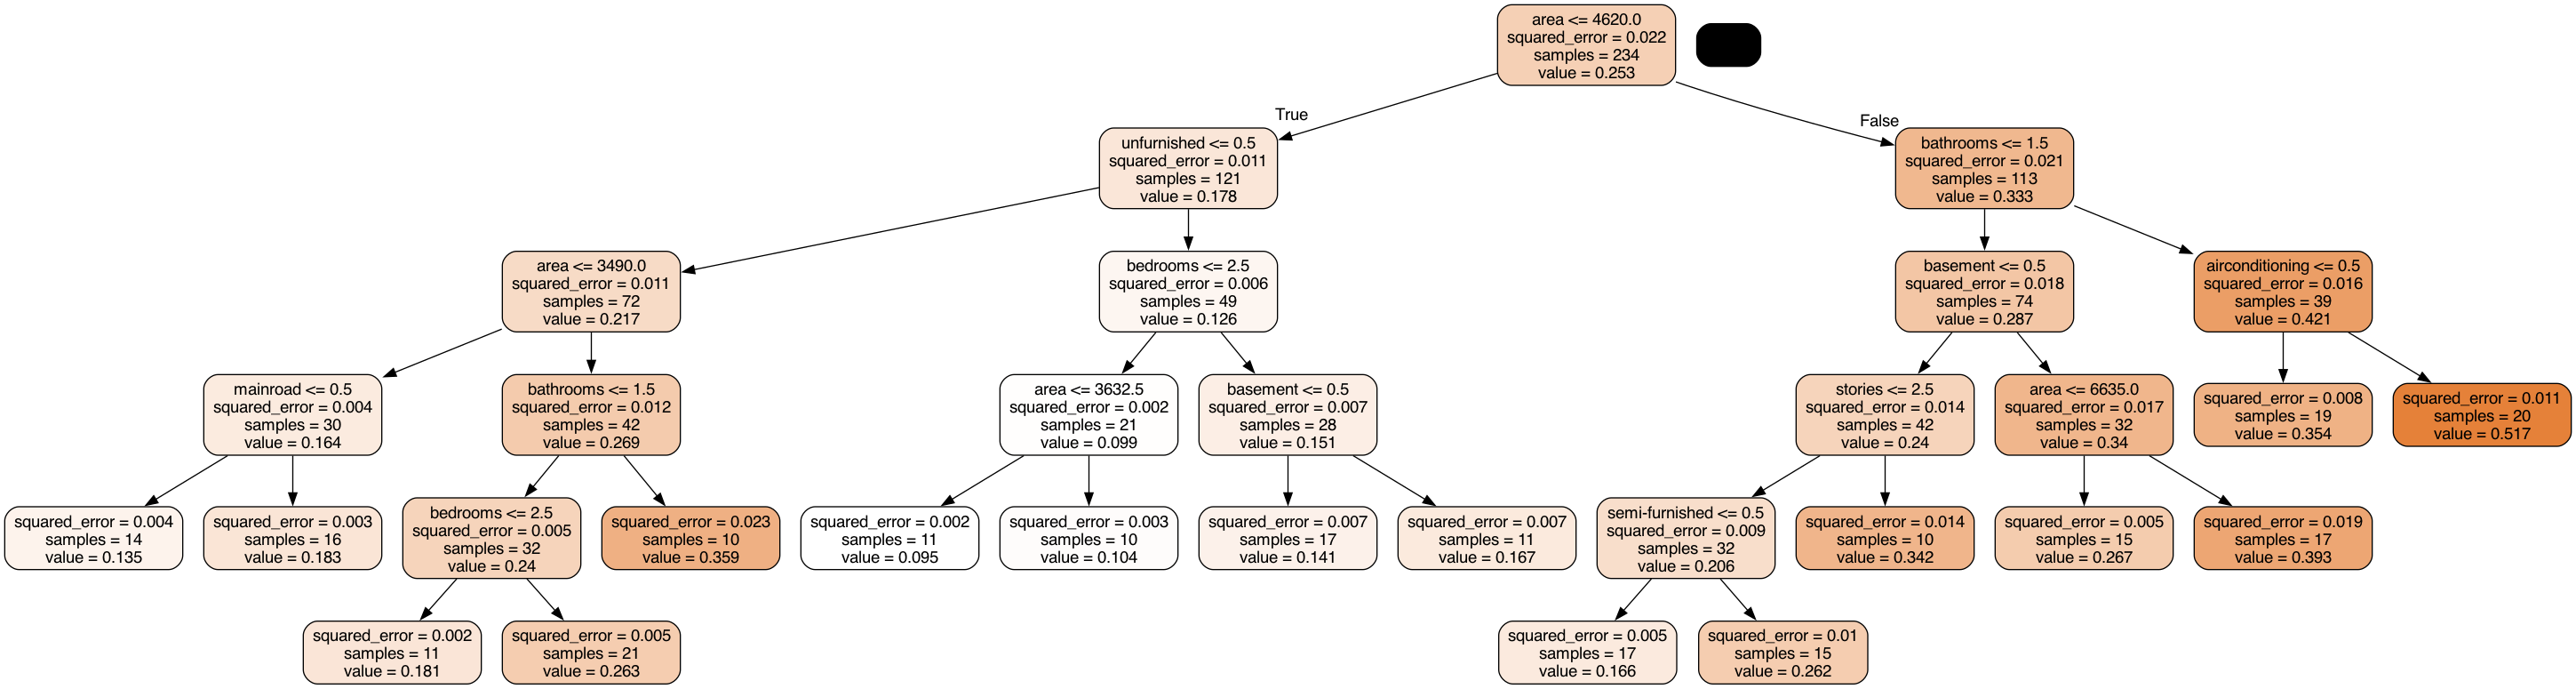

In [17]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [18]:
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

In [19]:
r2_score(y_train, y_train_pred)

0.6781082182783679

In [20]:
r2_score(y_test, y_test_pred)

0.5556735487271589

In [21]:
rf.feature_importances_

array([0.52087594, 0.01381103, 0.26738773, 0.01914681, 0.00587498,
       0.00817021, 0.02371991, 0.        , 0.04360154, 0.03228028,
       0.02345068, 0.00412213, 0.03755875])

In [22]:
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp': rf.feature_importances_
})

In [23]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,area,0.520876
2,bathrooms,0.267388
8,airconditioning,0.043602
12,unfurnished,0.037559
9,parking,0.032280
6,basement,0.023720
10,prefarea,0.023451
3,stories,0.019147
1,bedrooms,0.013811
5,guestroom,0.008170
